In [1]:
%load_ext autoreload
%autoreload 2


from tools import prepare_data, load_data, get_label_dict, get_word_labels
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
img_folder= "data/tiny-imagenet-200/"

In [3]:
X_train, _ = load_data()

Loading train data

Finished loading train data



In [4]:
num_samples = 1000
X_copy = np.copy(X_train[:num_samples])

In [5]:
X_copy = X_copy.reshape((num_samples,-1))


## From here, we can see how the dimensionality reduction reduces the variance of the dataset. We can choose a baseline of the variance retained for our future training. As an example if we want our preprocessed dataset to retain 90% of data, we would chose a number of dimensions equal to the baseline 90 as determined by the graph.

In [6]:
k_dimensions = [i for i in range(1, 12288, 100)]
retained_variance_percentage = []
x_vals = [i for i in k_dimensions]
pca = PCA()
X_fit = pca.fit(X_copy)
for k_dim in k_dimensions:
    retained_variance_percentage.append(np.sum(pca.explained_variance_ratio_[:k_dim]))
    

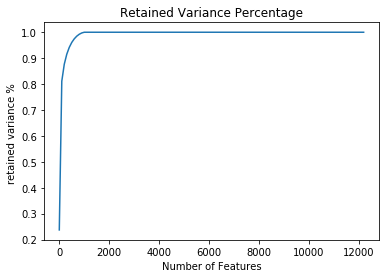

In [7]:
plt.plot(x_vals, retained_variance_percentage)
plt.xlabel("Number of Features")
plt.ylabel("retained variance % ")
plt.title("Retained Variance Percentage")
plt.show()

## We will find similar results if we perform PCA independently across all three color channels

In [8]:
X_red, X_blue, X_green = X_train[:num_samples,:,:,0], X_train[:num_samples,:,:,1], X_train[:num_samples,:,:,2]
X_red = X_red.reshape((num_samples, -1))
X_blue = X_blue.reshape((num_samples, -1))
X_green = X_green.reshape((num_samples, -1))

In [9]:
color_channels = {"red": X_red, "blue": X_blue, "green": X_green}

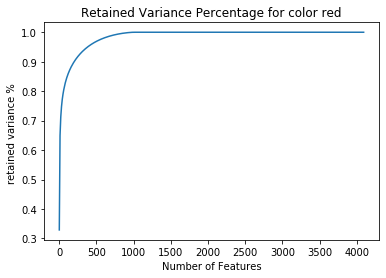

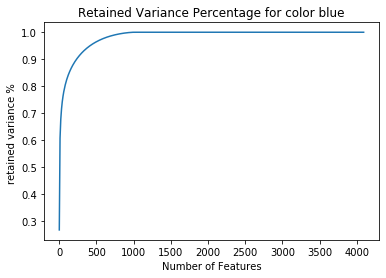

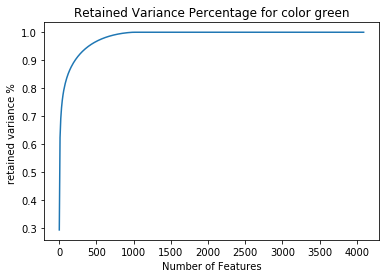

In [10]:
k_dimensions = [i for i in range(1, 4096, 10)]
retained_variance_percentage = []
x_vals = [i for i in k_dimensions]

for color, data in color_channels.items():
    pca = PCA()
    X_fit = pca.fit(data)
    for k_dim in k_dimensions:
        retained_variance_percentage.append(np.sum(pca.explained_variance_ratio_[:k_dim]))
    plt.plot(x_vals, retained_variance_percentage, label=color)
    plt.xlabel("Number of Features")
    plt.ylabel("retained variance % ")
    plt.title(f"Retained Variance Percentage for color {color}")
    plt.show()
    retained_variance_percentage = []
    